# Statistical Inference Exercises

### BDIMS Data Overview

In the following Exercises, you will be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

Data source: amstat.org

You will begin by downloading the dataset of around 500 observations from OpenIntro website as below.

[link](https://github.com/akmand/datasets/blob/main/openintro/bdims.csv)

Place the csv in the same directory as this notebook and read in the data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

# so that we can see all the columns
pd.set_option('display.max_columns', None) 

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/bdims.csv'
url_content = requests.get(df_url, verify=False).content
bdims = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# bdims = pd.read_csv('bdims.csv')

bdims.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


**Exercise 1:** Make a histogram of men's heights and a histogram of women's heights. How would you compare the various aspects of the two distributions?

**Hint:** `sex = 1` means male, otherwise female.

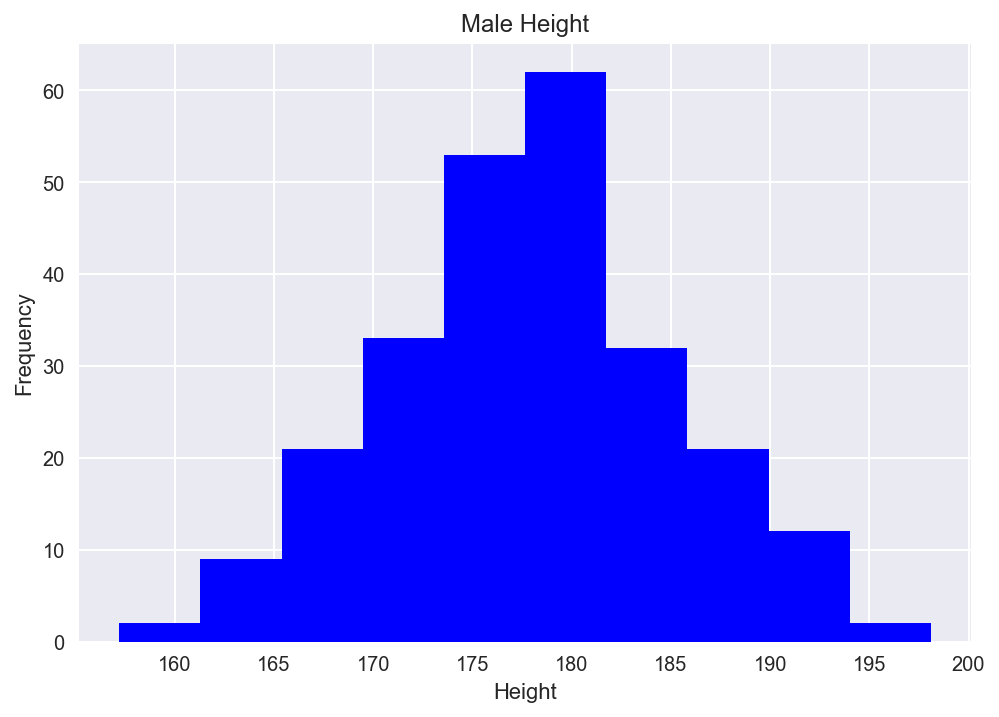

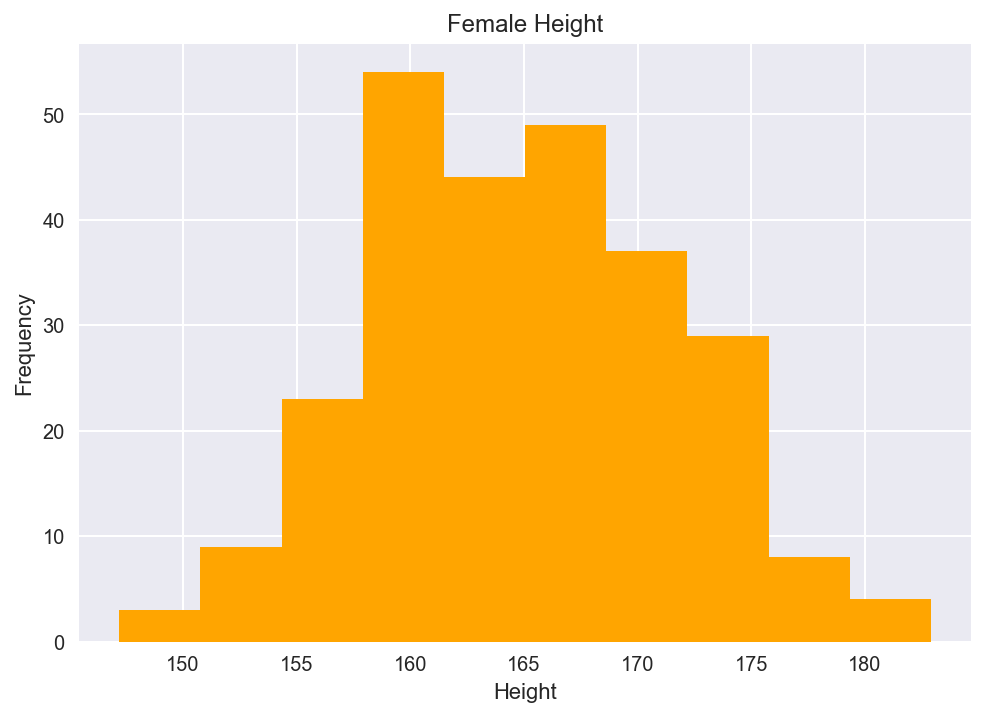

Both distributions roughly follow the normal distribution. Average height is higher for men.


In [2]:
from scipy.stats import norm,t

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

# Create two data sets: one with only men and another one with only women.
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

plt.hist(mdims['hgt'], color = 'blue')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Male Height')
plt.show()

plt.hist(fdims['hgt'], color = 'orange')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Female Height')
plt.show()

print('Both distributions roughly follow the normal distribution. Average height is higher for men.')

**Exercise 2:** Make a normal probability plot of men's heights and a normal probability plot of women's heights. Do all of the points fall on the line?

**Hint:** Use `probplot` function from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html).

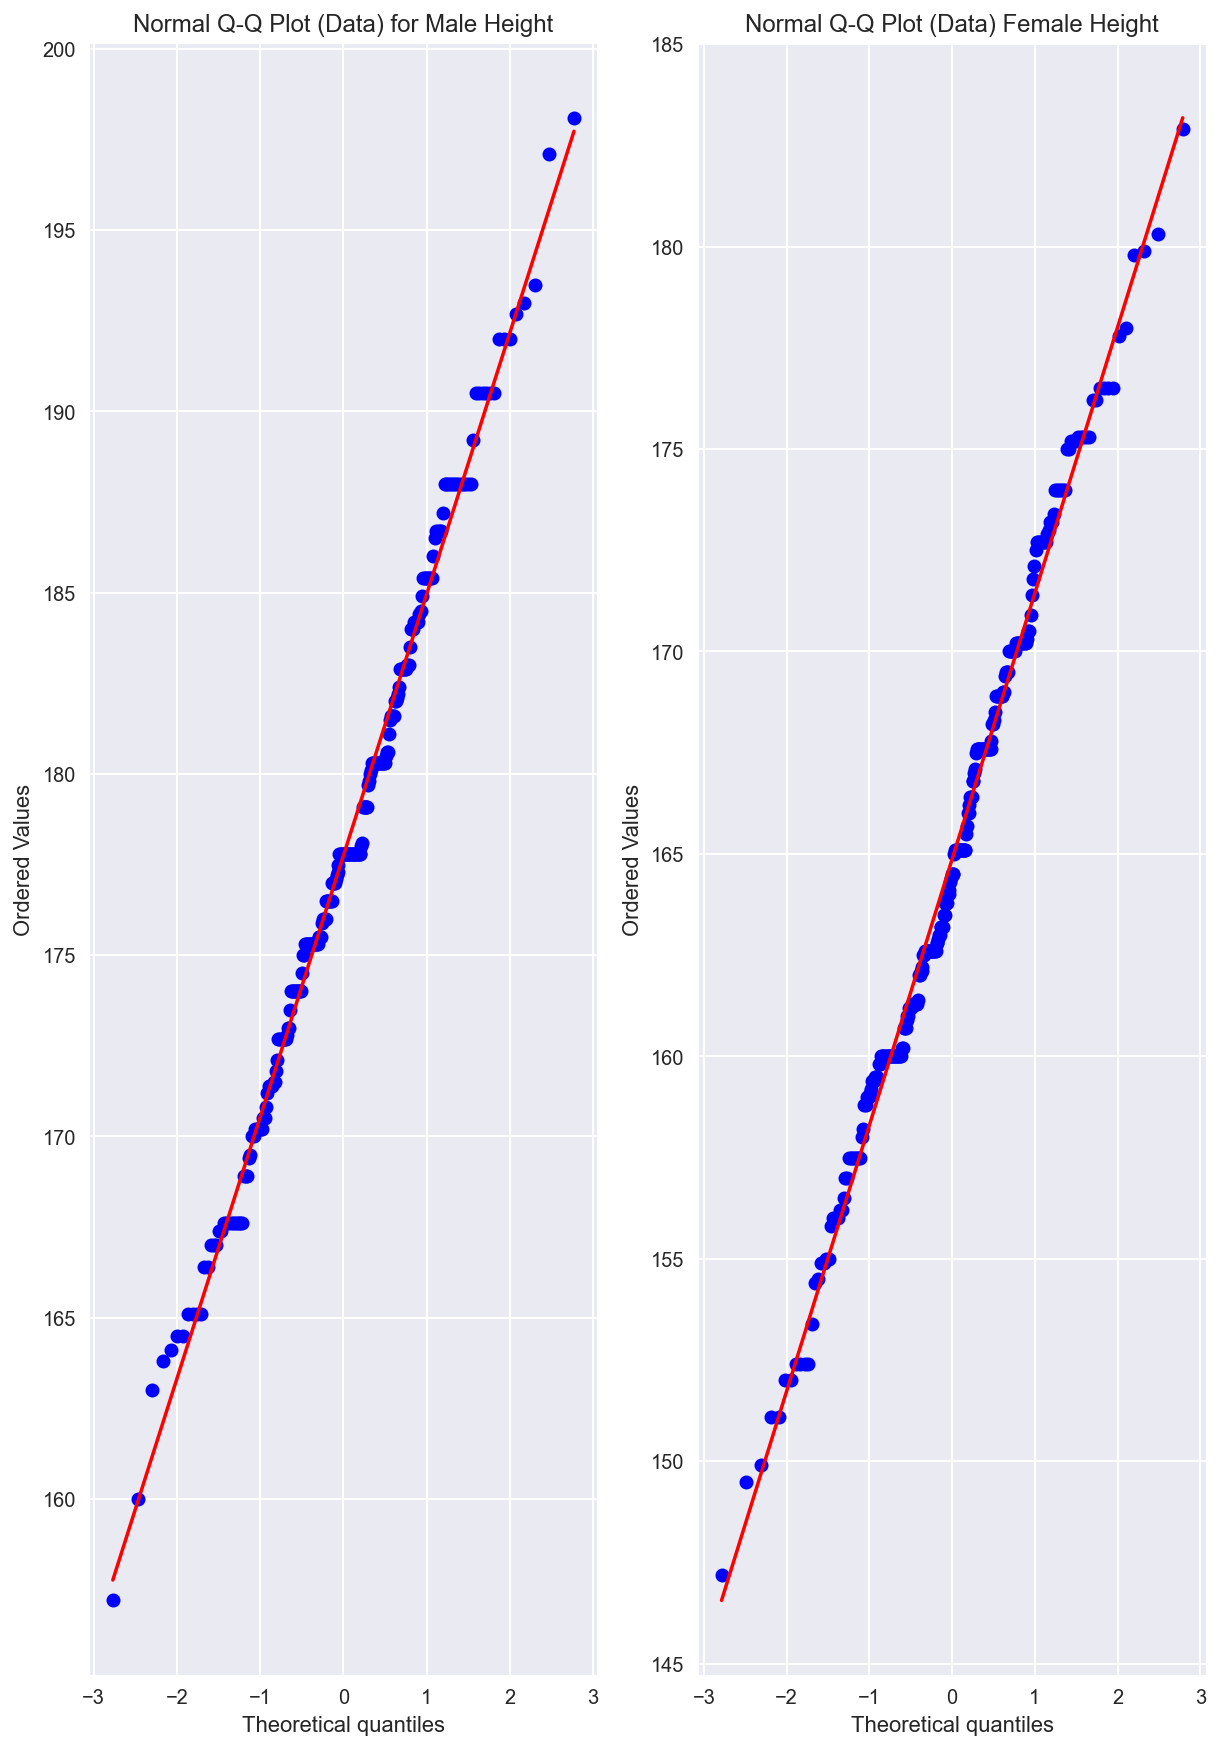

In [3]:
from scipy.stats import probplot

plt.figure(figsize=(10,15))

plt.subplot(1, 2, 1)
probplot(mdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data) for Male Height')

plt.subplot(1, 2, 2)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data) Female Height')

plt.show();

**Exercise 3:** Now that we have seen that both male and female heights are approximately normally distributed, let's focus on male height. What is the sample mean and standard deviation of `hgt`? 

In [4]:
mht = mdims['hgt']

print(f"The sample mean is {mht.mean():.2f}")
print(f"The sample standard deviation is {np.std(mht, ddof = 1):.2f}")

The sample mean is 177.75
The sample standard deviation is 7.18


**Exercise 4:** What is the standard error for male height?

In [5]:
# standard deviation
sample_sd = np.std(mht , ddof=1)

# standard error = std / sqrt(n)
standard_error = sample_sd/np.sqrt(len(mht))
print(f"The standard error is: {standard_error:.3f}")

The standard error is: 0.457


**Exercise 5:** Calculate the 95% confidence interval for men's height

In [6]:
alpha = (1-0.95)/2

print(f"ME = |Zscore * standard error| = {abs(norm.ppf(alpha)*0.457):.2f}")

CI_lower = 177.75 - abs(norm.ppf(alpha)*0.457)
CI_upper = 177.75 + abs(norm.ppf(alpha)*0.457)

print(f"CI_lower = sample mean - Margin of error = 177.75 - Z_0.025 * 0.457 = {CI_lower:.2f}")
print(f"CI_upper = sample mean + Margin of error = 177.75 + Z_0.975 * 0.457 = {CI_upper:.2f}") 

print(f"The 95% confidence interval is [{CI_lower:.2f}, {CI_upper:.2f}]")

ME = |Zscore * standard error| = 0.90
CI_lower = sample mean - Margin of error = 177.75 - Z_0.025 * 0.457 = 176.85
CI_upper = sample mean + Margin of error = 177.75 + Z_0.975 * 0.457 = 178.65
The 95% confidence interval is [176.85, 178.65]


**Exercise 6:** Would you expect the 90% confidence interval to be wider or more narrow than the 95% confidence interval? Calculate the 90% Confidence interval for mens height to confirm your answer

In [7]:
alpha = (1-0.90)/2

print(f"ME = |Zscore * standard error| = {abs(norm.ppf(alpha)*0.457):.2f}")

CI_lower = 177.75 - abs(norm.ppf(alpha)*0.457)
CI_upper = 177.75 + abs(norm.ppf(alpha)*0.457)

print(f"CI_lower = sample mean - Margin of error = 177.75 - Z_0.025 * 0.457 = {CI_lower:.2f}")
print(f"CI_upper = sample mean + Margin of error = 177.75 + Z_0.975 * 0.457 = {CI_upper:.2f}") 

print(f"The 90% confidence interval is [{CI_lower:.2f}, {CI_upper:.2f}]")

ME = |Zscore * standard error| = 0.75
CI_lower = sample mean - Margin of error = 177.75 - Z_0.025 * 0.457 = 177.00
CI_upper = sample mean + Margin of error = 177.75 + Z_0.975 * 0.457 = 178.50
The 90% confidence interval is [177.00, 178.50]


**Exercise 7:** Perform a hypothesis test using a 5% significance test on female height to see whether the mean height is different to 164.

In [8]:
# get female heights
fht = fdims['hgt']

# mean and std
mean = fht.mean()
std = fht.std(ddof=1)

# define your hypothesis
print("Let x represent the mean female height")
print("H0: x = 164")
print("Ha: x != 164\n")

# Calculate the test statistic
T = (164-mean)/(std/np.sqrt(len(fht)))
print(f"test_statistic = (x - sample_mean)/(std/sqrt(n)) = {T:.2f}")

p = 2*(1-norm.cdf(abs(T)))

print(f"p_value = P(|T|> 0.29) = {p:.3f}\n")

print("Since our p value is less than 0.05, we reject the null hypothesis at a 5% significance level\nand conclude that the mean female height is different to 164")

Let x represent the mean female height
H0: x = 164
Ha: x != 164

test_statistic = (x - sample_mean)/(std/sqrt(n)) = -2.15
p_value = P(|T|> 0.29) = 0.032

Since our p value is less than 0.05, we reject the null hypothesis at a 5% significance level
and conclude that the mean female height is different to 164


**Question 8:** Would we have reached the same conclusion in the previous question if we were using a 1% significance level?

In [9]:
print("""If we were using a 1% significance level, then the p value would be greater than 0.01 
so we would fail to reject the null hypothesis and conclude that the mean female height is 164.""")

If we were using a 1% significance level, then the p value would be greater than 0.01 
so we would fail to reject the null hypothesis and conclude that the mean female height is 164.


**Exercise 9:** We will now shift our attention to t distributions.

We use scipy.stats generate a random sample (seed =11) of 20 centered around 5 and with a standard deviation of 0.9 by running the following code:

```{code}
np.random.seed(11)
x = norm.rvs(loc = 5 , scale = 0.9, size =20)
```

What is the sample mean and standard deviation?


In [10]:
np.random.seed(11)
x = norm.rvs(loc = 5 , scale = 0.9, size =20)

print(f"The sample mean is {x.mean():.2f} and standard deviation is {x.std(ddof=1):.2f}")

The sample mean is 4.83 and standard deviation is 0.92


**Exercise 10:** Plot this random sample as a distribution plot in seaborn with kde set to True. How would you describe the distribution?

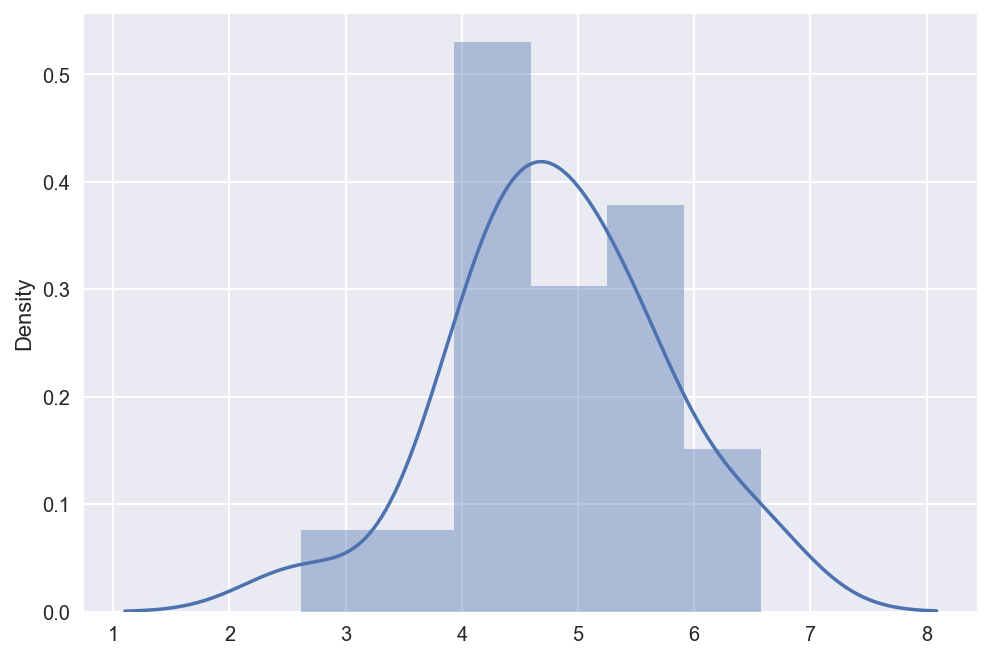

The data is unimodal and somewhat symmetric


In [11]:
import seaborn as sns

sns.distplot(x ,kde=True)
plt.show()

print("The data is unimodal and somewhat symmetric")

**Exercise 11:** Calculate the p_value for the null and alternate hypothesis below on the randomly generated data.

$$H_0: \mu = 5.22 $$
$$H_1: \mu \neq 5.22$$

In [12]:
# standard error
se = np.std(x , ddof=1)/np.sqrt(20)

null = 5.22
mean = x.mean()

# test statistic
test = (null - mean)/se

# p value
p_value = 2*(1-abs(t.cdf(test , df=19)))

print(f"The p value is {p_value:.3f}")

The p value is 0.072


**Exercises 12:**
How do we interpret the p value? For what conventional significance levels (1%, 5% and 10%) do we reject and fail to reject the hypothesis.


In [13]:
print("""
The p-value is a measure of the probability that an observed deviance from the null hypothesis 
could have occurred justby random chance.

For a significance level of of 1% and 5% we fail to reject the null hypothesis whereas we 
reject the null hypothesis for a significance level of 10%.""")


The p-value is a measure of the probability that an observed deviance from the null hypothesis 
could have occurred justby random chance.

For a significance level of of 1% and 5% we fail to reject the null hypothesis whereas we 
reject the null hypothesis for a significance level of 10%.


**Exercise 13:** For a different alone variable, you are given the following hypotheses:

$Ho$: $\mu$ = 60

$Ha$: $\mu$ != 60

The sample standard deviation is 8 and the sample size is 20. For what sample mean would the p-value be equal to 0.05? Assume that all conditions necessary for inference are satisfied.

In [14]:
print(f"""
For the single tails to each be 0.025 at n - 1 = 20 - 1 = 19 degrees of feedom, T score must
equal to be either {t.ppf(0.025, df=19):.2f} or {t.ppf(1-0.025, df=19):.2f}. Then, either:""")
###
print(f"-2.09 = (sample_mean-60)/(8/(20)^1/2) ---> sample_mean = {(-2.09*8/np.sqrt(20)+60):.2f}")
print(f" 2.09 = (sample_mean-60)/(8/(20)^1/2) ---> sample_mean = {(2.09*8/np.sqrt(20)+60):.2f}")


For the single tails to each be 0.025 at n - 1 = 20 - 1 = 19 degrees of feedom, T score must
equal to be either -2.09 or 2.09. Then, either:
-2.09 = (sample_mean-60)/(8/(20)^1/2) ---> sample_mean = 56.26
 2.09 = (sample_mean-60)/(8/(20)^1/2) ---> sample_mean = 63.74


***
www.featureranking.com